# Day 1: Linear Regression Introduction & Demo (1.3)

## Table of Contents
1. [Linear Regression Theory Introduction (1.3.1)](#linear-regression-theory)
   - What is Regression?
   - Linear Regression: The Goal
   - Simple Linear Regression (One Feature)
   - Finding the "Best Fit" Line
   - The Cost Function: Mean Squared Error (MSE)
   - How is the MSE Minimized? (Conceptual)
   - Multiple Linear Regression (Multiple Features)
2. [Demo Lab: Basic Scikit-learn Workflow (fit/predict) (1.3.2)](#demo-lab)
   - Objective
   - Dataset
   - Implementation Steps
   - Code Walkthrough
   - Lab Summary
3. [Practice Questions](#practice-questions)

<a id="linear-regression-theory"></a>
## 1.3.1 Linear Regression Theory Introduction

### What is Regression?
Before diving into the specific algorithm, recall that regression is a type of supervised learning where the goal is to predict a **continuous numerical value** (e.g., price, temperature, age).

### Linear Regression: The Goal
Linear Regression is often the first regression algorithm people learn because it's relatively simple and interpretable. Its goal is to model the linear relationship between a **dependent variable** (the target y we want to predict) and one or more **independent variables** (the input features X). It does this by fitting a straight line (or a plane/hyperplane for multiple features) through the data points.

![Linear Regression Goal](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_04/Linear.png)

### Simple Linear Regression (One Feature)
When we have only one input feature (x), the relationship is modeled as:

$y = \beta_0 + \beta_1 x + \epsilon$

Where:
- y: The actual value of the dependent variable.
- x: The value of the independent variable (feature).
- β₀: The **intercept** (the predicted value of y when x=0).
- β₁: The **slope** or **coefficient** (the change in the predicted value of y for a one-unit increase in x).
- ε: The **error term**, representing the difference between the actual value y and the value predicted by the linear relationship (noise or factors not captured by x).

The model learns the best estimates for the coefficients (β̂₀ and β̂₁) to make predictions:

$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x$

Where ŷ (read "y-hat") is the predicted value of y.

**Visualization:** Imagine a scatter plot of your data points (x,y). Simple Linear Regression finds the straight line that best "cuts through" these points.

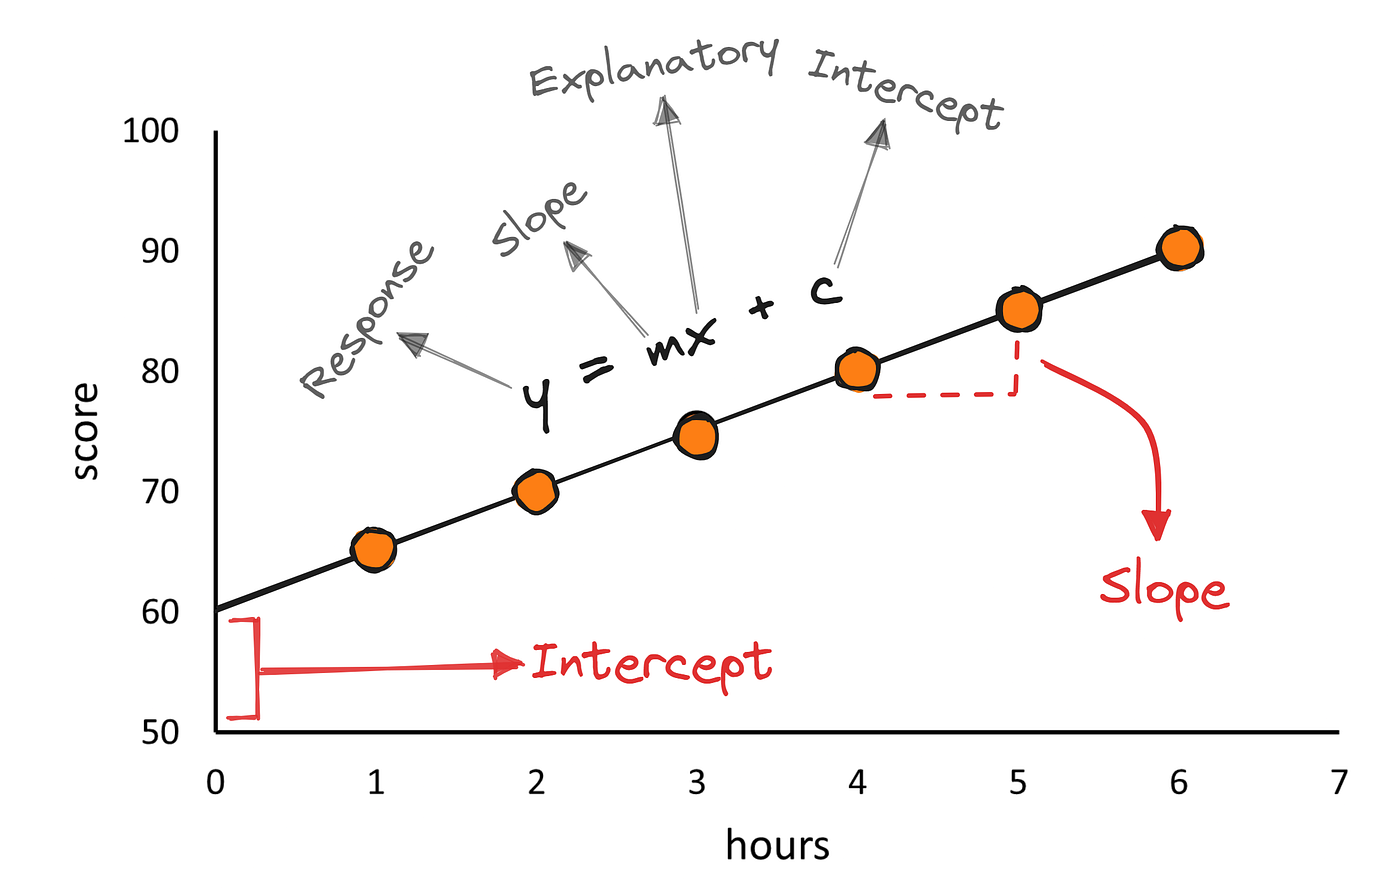

### Finding the "Best Fit" Line
How does the algorithm decide which line is "best"? It aims to minimize the **errors** (also called **residuals**) between the actual values (yᵢ) and the values predicted by the line (ŷᵢ) for all data points i.

We need a way to quantify the total error across all data points.

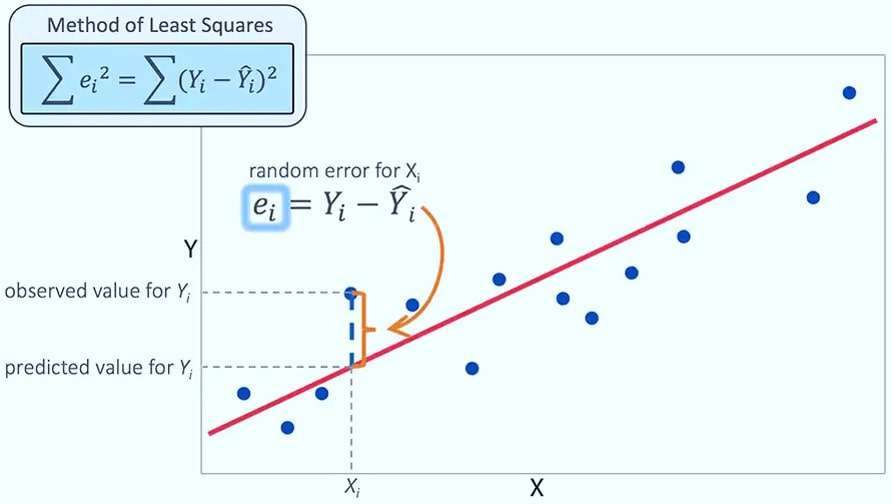

### The Cost Function: Mean Squared Error (MSE)
The most common way to measure the total error in linear regression is the Mean Squared Error (MSE).

**Formula:**

$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \frac{1}{n} \sum_{i=1}^{n} (Actual_i - Predicted_i)^2$

Where n is the number of data points.

**Intuition:**
- Calculate the difference (error) between the actual and predicted value for each data point (yᵢ - ŷᵢ).
- Square each difference (this penalizes larger errors more heavily and ensures errors don't cancel each other out).
- Sum up all the squared errors.
- Divide by the number of data points to get the average squared error.

**Goal:** The Linear Regression algorithm finds the values of the coefficients (β̂₀, β̂₁) that make the MSE as small as possible.

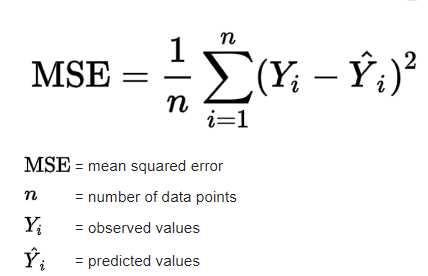

### How is the MSE Minimized? (Conceptual)
**Mathematical Solution (Normal Equation):** There's a direct formula derived using calculus that can solve for the optimal coefficients in one step. This works well for smaller datasets but can be computationally expensive for a very large number of features.

**Iterative Optimization (Gradient Descent):** This is a more general optimization algorithm used widely in Machine Learning.
- **Analogy:** Imagine being on a foggy hill and wanting to reach the lowest point. You feel the slope beneath your feet (the gradient) and take a step downhill. You repeat this until you reach the bottom (the minimum cost).
- **Process:** It starts with initial guesses for the coefficients and iteratively adjusts them by taking small steps in the direction that most rapidly decreases the cost function (MSE). The size of these steps is controlled by a parameter called the **learning rate**.

*(Scikit-learn's LinearRegression typically uses the mathematical approach (via linear algebra), but understanding Gradient Descent is crucial for many other ML algorithms, especially in deep learning).*

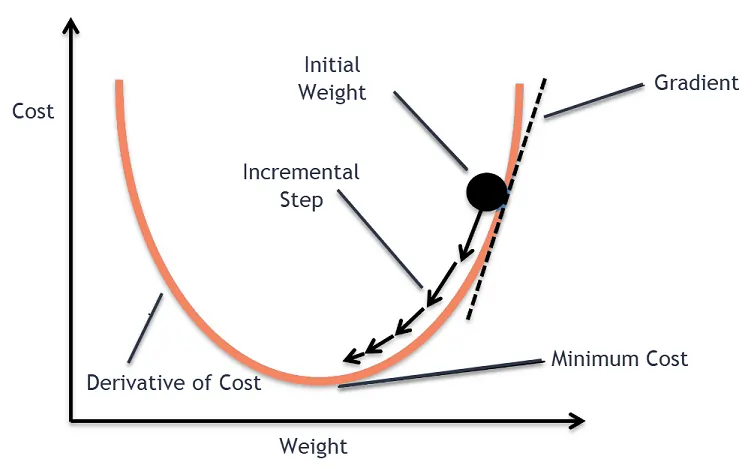

### Multiple Linear Regression (Multiple Features)

Definition: Multiple linear regression models the relationship between two or more independent variables/predictors/features and the dependent variable as a straight line.

When we have multiple input features (x₁, x₂, ..., xₚ), the concept remains the same, but the equation expands:

$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 + \cdots + \hat{\beta}_p x_p$

- $ x_1, x_2, \ldots, x_n $ are the predictor variables,
- $ \beta_1, \beta_2, \ldots, \beta_n $ are the coefficients for each predictor.

Here, each feature xⱼ has its own coefficient β̂ⱼ, representing the change in ŷ for a one-unit change in xⱼ, assuming all other features are held constant.

Instead of fitting a line, the model fits a **plane** (for 2 features) or a **hyperplane** (for >2 features) to the data in higher-dimensional space. The goal is still to minimize the MSE.

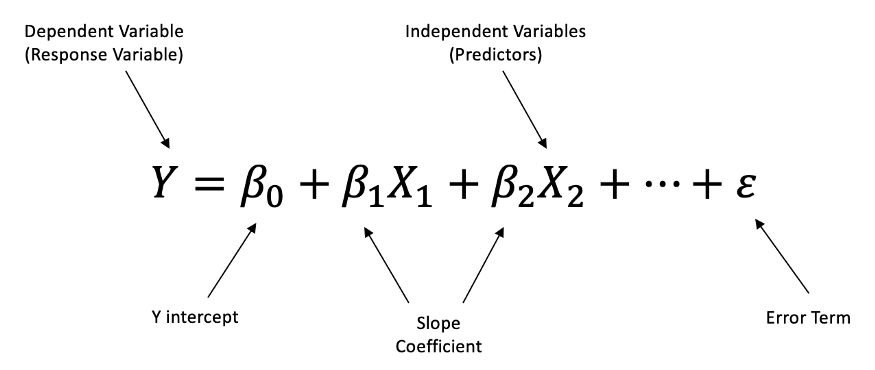

![Multiple Linear Regression](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson04_Regression/updates/multiple_linear_regression.jpg)

<a id="demo-lab"></a>
## 1.3.2 Demo Lab: Basic Scikit-learn Workflow (fit/predict)

### Objective
Apply the concepts learned and practice the core Scikit-learn API (fit, predict) for a simple Linear Regression task.

### Dataset
We will use the **California Housing dataset**, which is readily available in Scikit-learn. The goal is to predict the median house value in California districts based on features like median income, house age, average rooms, etc.

### Implementation Steps
1. Import Libraries
2. Load and Explore Data
3. Define Features (X) and Target (y)
4. Split Data into Training and Testing Sets
5. Instantiate the Model
6. Train (Fit) the Model
7. Inspect the Learned Model (Optional)
8. Make Predictions
9. Evaluate the Model
10. Visualize Predictions vs Actual (Optional)

### Code Walkthrough

### Linear (Univariate) Regression 

`The relationship between hours studied and exam scores`

In [3]:
# Simple Linear Regression Demo
# ------------------------------------
# This script demonstrates simple linear regression using a practical, relatable example:
# The relationship between hours studied and exam scores

# --- Step 1: Import Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Set a nicer aesthetic style for plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
# --- Step 2: Create a Dataset ---
# We'll create a simple dataset relating hours studied to exam scores
# This simulates a real-world scenario that students can easily relate to

# Set random seed for reproducibility
np.random.seed(42)

# Generate data
n_samples = 200  # Number of students

# Hours studied ranging from 1 to 10 hours
hours_studied = np.random.uniform(1, 10, n_samples).round()

# Generate exam scores with a linear relationship + some noise
# Base formula: score = 50 + 5 * hours_studied + noise
# - Starting point: 50 (base score without studying)
# - Each hour of study adds about 5 points on average
# - Add Gaussian noise (standard deviation = 7) to simulate real-world variability
noise = np.random.normal(0, 7, n_samples)
exam_scores = 50 + 5 * hours_studied + noise

# Ensure scores are between 0 and 100
exam_scores = np.clip(exam_scores, 0, 200).round()

# Create a DataFrame
data = pd.DataFrame({
    'hours_studied': hours_studied,
    'exam_score': exam_scores
})

In [5]:
# Display the first few rows of our dataset
print("First 5 rows of our dataset:")
data.head()

First 5 rows of our dataset:


,hours_studied,exam_score
0,4.0,65.0
1,10.0,102.0
2,8.0,92.0
3,6.0,75.0
4,2.0,73.0


In [6]:
# Display basic statistics
print("\nBasic statistics:")
data.describe()


Basic statistics:


,hours_studied,exam_score
count,200.000000,200.000000
mean,5.360000,77.265000
std,2.667579,14.830187
min,1.000000,46.000000
25%,3.000000,65.000000
50%,5.000000,76.000000
75%,8.000000,90.250000
max,10.000000,109.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hours_studied  200 non-null    float64
 1   exam_score     200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


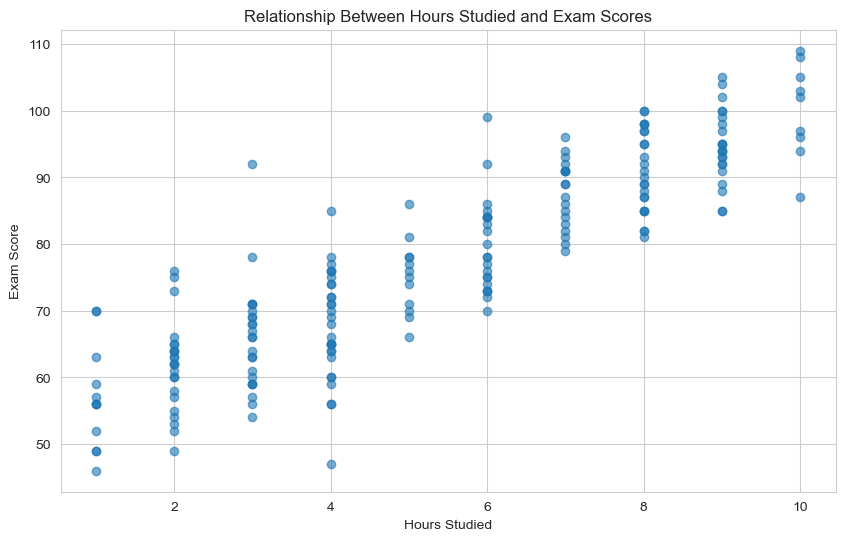

In [8]:
# --- Step 3: Explore the Data Visually ---
# Visualizing data is crucial before fitting any model
# It helps us understand the relationship and identify potential issues

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(data['hours_studied'], data['exam_score'], alpha=0.6)
plt.title('Relationship Between Hours Studied and Exam Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

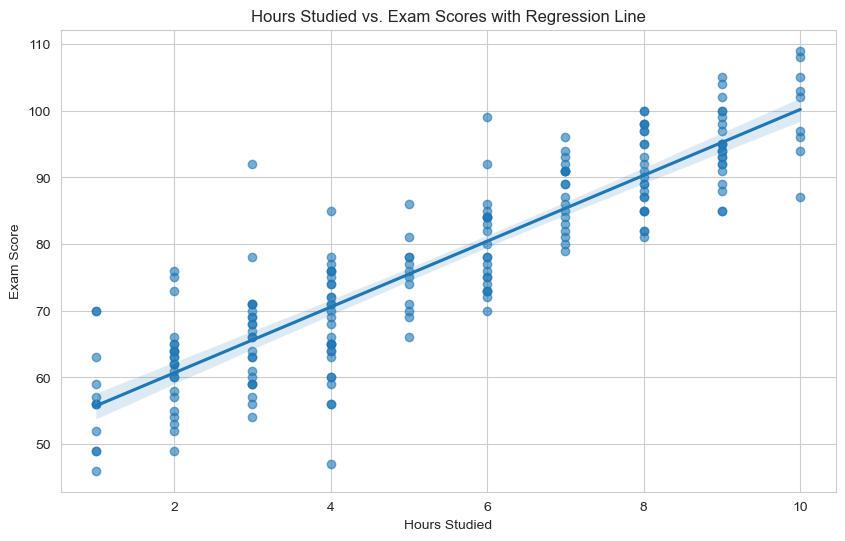

In [9]:
# Additional visualization with regression line using Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='hours_studied', y='exam_score', data=data, scatter_kws={'alpha':0.6})
plt.title('Hours Studied vs. Exam Scores with Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

In [10]:
# --- Step 4: Split Data into Training and Testing Sets ---
# We'll use 80% of the data for training and 20% for testing
# This is essential to evaluate how well our model generalizes to new data

# Define features (X) and target (y)
X = data['hours_studied'].values.reshape(-1, 1)  # Reshape is necessary for scikit-learn
y = data['exam_score'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nData split complete:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")


Data split complete:
Training set: 160 samples
Testing set: 40 samples


In [11]:
# --- Step 5: Create and Train the Model ---
# Now we'll create a simple linear regression model and train it on our data

# 1. Instantiate the model
model = LinearRegression()

In [12]:
# 2. Train the model using the training data
model.fit(X_train, y_train)
print("\nModel training completed using .fit()")


Model training completed using .fit()


In [13]:
# 3. Extract and display the model parameters
intercept = model.intercept_
slope = model.coef_[0]
print(f"\nLinear Regression Model Parameters:")
print(f"Intercept (β₀): {intercept:.2f}")
print(f"Slope (β₁): {slope:.2f}")


Linear Regression Model Parameters:
Intercept (β₀): 50.01
Slope (β₁): 5.08


In [14]:
# Interpret the model parameters
print(f"\nInterpretation:")
print(f"- Base score (when study hours = 0): {intercept:.2f} points")
print(f"- Each additional hour of studying is associated with a {slope:.2f} point increase in exam score")


Interpretation:
- Base score (when study hours = 0): 50.01 points
- Each additional hour of studying is associated with a 5.08 point increase in exam score


In [15]:
# --- Step 6: Make Predictions ---
# Now we'll use our trained model to make predictions

# Make predictions on both training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("\nExample predictions:")
for i in range(5):
    print(f"Student studied {X_test[i][0]:.1f} hours → Predicted score: {y_test_pred[i]:.1f}, Actual score: {y_test[i]}")


Example predictions:
Student studied 5.0 hours → Predicted score: 75.4, Actual score: 70.0
Student studied 3.0 hours → Predicted score: 65.3, Actual score: 78.0
Student studied 6.0 hours → Predicted score: 80.5, Actual score: 73.0
Student studied 3.0 hours → Predicted score: 65.3, Actual score: 63.0
Student studied 1.0 hours → Predicted score: 55.1, Actual score: 56.0


In [16]:
# --- Step 7: Evaluate the Model ---
# We'll calculate performance metrics to quantify how well our model fits the data

# Calculate metrics for training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for test data
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nModel Evaluation:")
print("Training Data:")
print(f"  Mean Squared Error (MSE): {train_mse:.2f}")
print(f"  Root Mean Squared Error (RMSE): {train_rmse:.2f}")
print(f"  R² Score: {train_r2:.2f}")

print("\nTest Data:")
print(f"  Mean Squared Error (MSE): {test_mse:.2f}")
print(f"  Root Mean Squared Error (RMSE): {test_rmse:.2f}")
print(f"  R² Score: {test_r2:.2f}")

# Interpret R² score
print(f"\nInterpretation of R² Score:")
print(f"  Approximately {test_r2*100:.1f}% of the variability in exam scores")
print(f"  can be explained by the number of hours studied.")


Model Evaluation:
Training Data:
  Mean Squared Error (MSE): 44.39
  Root Mean Squared Error (RMSE): 6.66
  R² Score: 0.81

Test Data:
  Mean Squared Error (MSE): 52.99
  Root Mean Squared Error (RMSE): 7.28
  R² Score: 0.71

Interpretation of R² Score:
  Approximately 71.1% of the variability in exam scores
  can be explained by the number of hours studied.


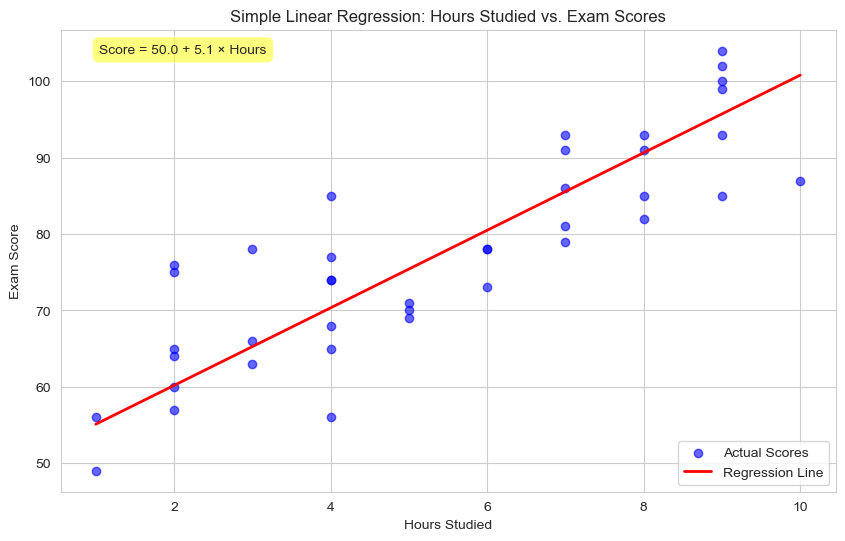

In [17]:
# --- Step 8: Visualize the Model ---
# Let's visualize our model's predictions against the actual data

# Create a scatter plot of the testing data
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Actual Scores')

# Add the regression line
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred_line = model.predict(x_range)
plt.plot(x_range, y_pred_line, color='red', linewidth=2, label='Regression Line')

# Add formula annotation
plt.annotate(f'Score = {intercept:.1f} + {slope:.1f} × Hours', 
             xy=(0.05, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.5", fc="yellow", alpha=0.5))

plt.title('Simple Linear Regression: Hours Studied vs. Exam Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Create a DataFrame to compare hours studied, actual values, predictions, and residuals
results_df = pd.DataFrame({'Hours_Studied': X_test.flatten(), 'Actual_Score': y_test, 'Predicted_Score': y_test_pred.round(1), 'Residual': (y_test - y_test_pred).round(1)})
print("Comparison of hours studied, actual values, predictions, and residuals:")
results_df.sort_values(by='Hours_Studied').head(10)  # Display first 10 rows, sorted by hours studied

Comparison of hours studied, actual values, predictions, and residuals:


,Hours_Studied,Actual_Score,Predicted_Score,Residual
22,1.0,49.0,55.1,-6.1
4,1.0,56.0,55.1,0.9
19,2.0,76.0,60.2,15.8
17,2.0,60.0,60.2,-0.2
16,2.0,64.0,60.2,3.8
10,2.0,57.0,60.2,-3.2
38,2.0,65.0,60.2,4.8
29,2.0,75.0,60.2,14.8
3,3.0,63.0,65.3,-2.3
20,3.0,66.0,65.3,0.7


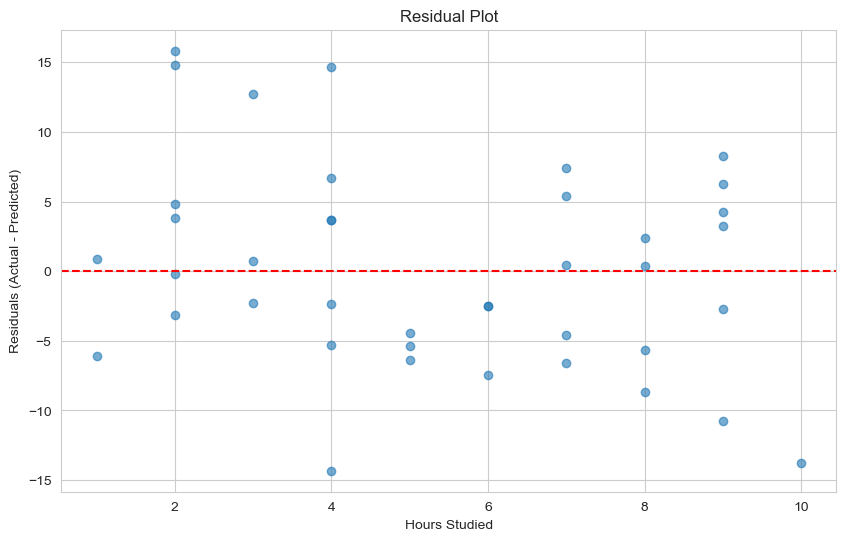

In [19]:
# --- Step 9: Residual Analysis ---
# Analyzing residuals (errors) helps us check if the linear model is appropriate

# Calculate residuals
residuals = y_test - y_test_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(X_test, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Hours Studied')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()

In [20]:
# --- Step 10: Make a Prediction for a New Student ---
# Now we can use our model to predict the exam score for a new student

# Let's say a new student studied for 7.5 hours
new_student_hours = np.array([[7.5]])
predicted_score = model.predict(new_student_hours)[0]

print(f"\nPrediction for a New Student:")
print(f"Hours studied: {new_student_hours[0][0]}")
print(f"Predicted exam score: {predicted_score:.1f}")


Prediction for a New Student:
Hours studied: 7.5
Predicted exam score: 88.1


In [21]:
# --- Step 11: Comparing Simple Linear Regression to Baseline ---
# Let's compare our model to a simple baseline that always predicts the mean score

# Calculate mean score from training data
mean_score = np.mean(y_train)
print(f"\nBaseline model (always predicting the mean score: {mean_score:.2f}):")


Baseline model (always predicting the mean score: 77.22):


In [22]:
# Calculate baseline metrics
baseline_mse = mean_squared_error(y_test, [mean_score] * len(y_test))
baseline_rmse = np.sqrt(baseline_mse)

print(f"  Baseline RMSE: {baseline_rmse:.2f}")
print(f"  Our Model RMSE: {test_rmse:.2f}")
print(f"  Improvement: {baseline_rmse - test_rmse:.2f} points ({(baseline_rmse - test_rmse) / baseline_rmse * 100:.1f}%)")

  Baseline RMSE: 13.55
  Our Model RMSE: 7.28
  Improvement: 6.27 points (46.3%)


In [40]:
# --- Step 12: Summary ---
print("\nSimple Linear Regression Summary:")
print(f"1. Model Equation: Score = {intercept:.2f} + {slope:.2f} × Hours Studied")
print(f"2. The model explains {test_r2*100:.1f}% of the variance in exam scores (R²)")
print(f"3. Each additional hour of studying is associated with a {slope:.2f} point increase in score")
print(f"4. The model can predict test scores with an RMSE of {test_rmse:.2f} points")


Simple Linear Regression Summary:
1. Model Equation: Score = 50.01 + 5.08 × Hours Studied
2. The model explains 71.1% of the variance in exam scores (R²)
3. Each additional hour of studying is associated with a 5.08 point increase in score
4. The model can predict test scores with an RMSE of 7.28 points


In [24]:
# --- Conclusion ---
print("\nConclusion:")
print("This simple linear regression example demonstrates the fundamental workflow for modeling")
print("a relationship between two variables. The steps we followed (data preparation,")
print("exploratory analysis, model training, evaluation, and interpretation) form the foundation")
print("for all regression tasks, including multiple linear regression with more features.")


Conclusion:
This simple linear regression example demonstrates the fundamental workflow for modeling
a relationship between two variables. The steps we followed (data preparation,
exploratory analysis, model training, evaluation, and interpretation) form the foundation
for all regression tasks, including multiple linear regression with more features.


### Multiple Linear Regression 

In [25]:
# --- Step 1: Import Libraries ---
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split  # Function to split data
from sklearn.linear_model import LinearRegression     # The algorithm class
from sklearn.metrics import mean_squared_error        # Evaluation metric
from sklearn.datasets import fetch_california_housing  # Function to load dataset
import matplotlib.pyplot as plt                       # For plotting
import seaborn as sns                                 # For enhanced plotting

print("Libraries imported successfully!")

Libraries imported successfully!


In [26]:
# --- Step 2: Load Data ---
# fetch_california_housing returns data and metadata. as_frame=True loads it as a pandas DataFrame.
california = fetch_california_housing(as_frame=True)
df = california.frame  # The DataFrame containing features and target

# It's good practice to understand the data
print("\nDataset Description Snippet:")
print(california.DESCR[:500] + "...")  # Print first 500 chars of description


Dataset Description Snippet:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group popu...


In [27]:
print("\nFirst 5 rows of the DataFrame:")
df.head()


First 5 rows of the DataFrame:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [28]:
print("\nDataFrame Info (check data types, non-null counts):")
df.info()


DataFrame Info (check data types, non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB



Visualizing Target Variable Distribution (MedHouseVal):


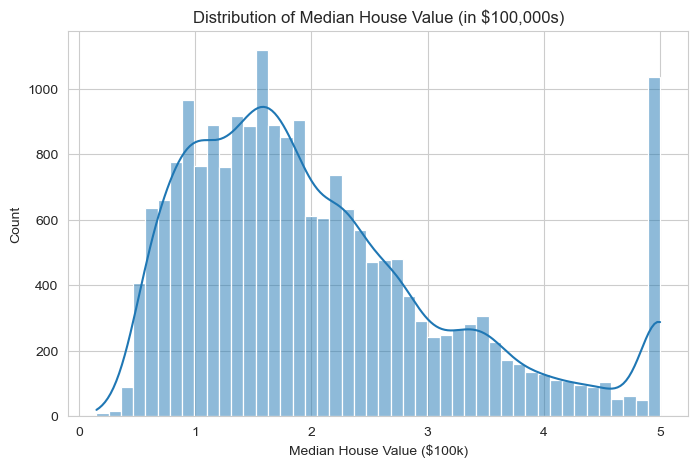

In [29]:
# --- Step 3: Basic EDA (Optional but Recommended) ---
# Visualize the distribution of the target variable we want to predict
print("\nVisualizing Target Variable Distribution (MedHouseVal):")
plt.figure(figsize=(8, 5))
sns.histplot(df['MedHouseVal'], kde=True)
plt.title('Distribution of Median House Value (in $100,000s)')
plt.xlabel("Median House Value ($100k)")
plt.show()

In [30]:
# --- Step 4: Define Features (X) and Target (y) ---
# X contains all columns EXCEPT the target variable ('MedHouseVal')
X = df.drop('MedHouseVal', axis=1)
# y contains ONLY the target variable
y = df['MedHouseVal']

print("\nFeatures (X) Shape:", X.shape)  # Should be (n_samples, n_features)
print("Target (y) Shape:", y.shape)      # Should be (n_samples,)


Features (X) Shape: (20640, 8)
Target (y) Shape: (20640,)


In [31]:
# --- Step 5: Split Data into Training and Testing Sets ---
# We split the data to train the model on one part and evaluate it on another, unseen part.
# test_size=0.2 means 20% of the data is reserved for the test set.
# random_state ensures that the split is the same every time we run the code (for reproducibility).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData split complete:")
print("Training set shapes (X, y):", X_train.shape, y_train.shape)
print("Testing set shapes (X, y):", X_test.shape, y_test.shape)


Data split complete:
Training set shapes (X, y): (16512, 8) (16512,)
Testing set shapes (X, y): (4128, 8) (4128,)


In [32]:
# --- Step 6: Instantiate the Model ---
# Create an instance of the LinearRegression class. We use default hyperparameters for now.
model = LinearRegression()
print(f"\nModel Instantiated: {model}")


Model Instantiated: LinearRegression()


In [33]:
# --- Step 7: Train (Fit) the Model ---
# The 'fit' method trains the model using the training data (X_train, y_train).
# It learns the optimal intercept and coefficients by minimizing MSE on this data.
model.fit(X_train, y_train)
print("\nModel training completed using .fit()")


Model training completed using .fit()


In [34]:
# --- Step 8: Inspect the Learned Model (Optional) ---
# We can examine the intercept and coefficients learned during training.
print(f"\nLearned Intercept (beta_0): {model.intercept_:.4f}")
print("\nLearned Coefficients (beta_1 to beta_p):")
# Display coefficients alongside feature names for better interpretation
coeffs = pd.Series(model.coef_, index=X.columns)
print(coeffs)
# Example Interpretation: A 1-unit increase in 'MedInc' (Median Income) is associated
# with approx. a 0.437 unit increase in 'MedHouseVal', holding other features constant.


Learned Intercept (beta_0): -37.0233

Learned Coefficients (beta_1 to beta_p):
MedInc        0.448675
HouseAge      0.009724
AveRooms     -0.123323
AveBedrms     0.783145
Population   -0.000002
AveOccup     -0.003526
Latitude     -0.419792
Longitude    -0.433708
dtype: float64


In [35]:
# --- Step 9: Make Predictions ---
# Use the trained model's '.predict()' method to make predictions on the test set (X_test).
# It's crucial to evaluate on data the model hasn't seen during training.
y_pred_test = model.predict(X_test)

print("\nPredictions generated for the test set using .predict()")
print("Example - First 5 Predictions:", y_pred_test[:5])
print("Example - First 5 Actual Values:", y_test.values[:5])


Predictions generated for the test set using .predict()
Example - First 5 Predictions: [0.71912284 1.76401657 2.70965883 2.83892593 2.60465725]
Example - First 5 Actual Values: [0.477   0.458   5.00001 2.186   2.78   ]


In [36]:
# --- Step 10: Basic Evaluation ---
# Calculate the Mean Squared Error between the actual test values (y_test)
# and the model's predictions (y_pred_test).
mse_test = mean_squared_error(y_test, y_pred_test)
# Calculate Root Mean Squared Error (RMSE) for easier interpretation (same units as target)
rmse_test = np.sqrt(mse_test)

print(f"\nMean Squared Error (MSE) on Test Set: {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse_test:.4f}")
# Interpretation: The RMSE suggests our model's predictions are, on average, about $72,500 off
# (since target is in $100k units, 0.725 * 100k = 72.5k). Is this good or bad? It depends on context!


Mean Squared Error (MSE) on Test Set: 0.5559
Root Mean Squared Error (RMSE) on Test Set: 0.7456


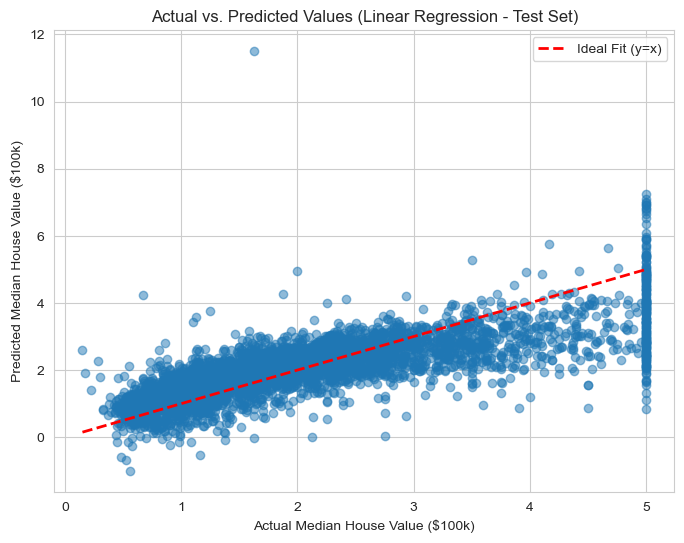

In [37]:
# --- Step 11: Visualize Predictions vs Actual (Optional) ---
# A scatter plot helps visualize prediction accuracy. Perfect predictions would lie on the red dashed line (y=x).
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)  # Use alpha for transparency if points overlap
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Ideal Fit (y=x)')
plt.xlabel("Actual Median House Value ($100k)")
plt.ylabel("Predicted Median House Value ($100k)")
plt.title("Actual vs. Predicted Values (Linear Regression - Test Set)")
plt.legend()
plt.grid(True)
plt.show()

In [39]:
# Create a DataFrame to compare hours studied, actual values, predictions, and residuals
results_df = pd.DataFrame({'Hours_Studied': X_test.flatten(), 'Actual_Score': y_test, 'Predicted_Score': y_test_pred.round(1), 'Residual': (y_test - y_test_pred).round(1)})
results_df

AttributeError: 'DataFrame' object has no attribute 'flatten'

### Lab Summary
This lab demonstrated the fundamental Scikit-learn workflow: loading data, splitting into train/test sets, instantiating a `LinearRegression` model, training it with `.fit()`, making predictions with `.predict()`, and performing a basic evaluation using `mean_squared_error`. We'll explore evaluation much more deeply in upcoming sessions.

<a id="practice-questions"></a>
## Practice Questions

### Linear Regression Theory Questions
1. What distinguishes regression problems from classification problems in supervised learning?
2. Explain the meaning of the slope (β₁) and intercept (β₀) in a simple linear regression model. What would a positive versus negative slope indicate about the relationship between variables?
3. Why do we square the errors when calculating MSE rather than just taking their absolute values?
4. Consider a simple linear regression model for predicting house prices based on square footage. If the model learns a coefficient (β₁) of 0.15 for square footage, what does this mean in practical terms?
5. Explain how gradient descent works conceptually for finding the optimal coefficients in linear regression.
6. When might the normal equation approach be preferred over gradient descent for solving linear regression? When might gradient descent be preferred?
7. What is the key difference in the model representation between simple linear regression and multiple linear regression?

### Scikit-learn Implementation Questions
1. Why is it important to split our data into training and testing sets? What might happen if we evaluated our model on the same data we used for training?
2. In the code, why do we convert the data to a pandas DataFrame rather than working with it in its original format?
3. What is the purpose of setting `random_state=42` in the `train_test_split` function?
4. How would you modify the code to use a 70/30 train/test split instead of the current 80/20 split?
5. If we wanted to train a polynomial regression model instead of a linear model, what would we need to change in the code?
6. Why might RMSE be a more intuitive metric than MSE for evaluating regression models?
7. Looking at the actual vs. predicted plot, what pattern would indicate that our model is systematically underestimating high-value houses and overestimating low-value houses?